<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedHyperParameterOptimisation/blob/ScikitOptimize/ScikitOptimize_RandomSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- The Random Search in Scikit Optimise is randomly picking the hyperparameter combinations and evaluate it aginst the metrics provided with within the number of iterations specified, the distribution of the hyperparameter combinations are irrelevent in this case
- Scikit Optmise method has more compatibility with non-sklearn machine learning models like xgboost, nueral networks etc

- Steps

1. define the model
2. define parameter space
3. define objective function
4. run the search with dummy_minimize class

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
dataset = load_breast_cancer()
data = dataset.data
columns = dataset.feature_names
df = pd.DataFrame(data = data, columns = columns)
df['target'] = dataset.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
X = df.drop('target', axis =1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100, stratify = y)

Define the model object

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# non-skleran model object
xgb = XGBClassifier(random_state = 100)

Parameter list --

max_depth: int = 3, learning_rate: float = 0.1, n_estimators: int = 100, verbosity: int = 1, silent: Any | None = None, objective: str = "binary:logistic", booster: str = 'gbtree', n_jobs: int = 1, nthread: Any | None = None, gamma: int = 0, min_child_weight: int = 1, max_delta_step: int = 0, subsample: int = 1, colsample_bytree: int = 1, colsample_bylevel: int = 1, colsample_bynode: int = 1, reg_alpha: int = 0, reg_lambda: int = 1, scale_pos_weight: int = 1, base_score: float = 0.5, random_state: int = 0, seed: Any | None = None, missing: Any | None = None, **kwargs: Any) -> None
Implementation of the scikit-learn API for XGBoost classification.

Define the parameter space

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 6.0 MB/s 


In [ ]:
from skopt.space import Integer,Real,Categorical

In [ ]:
params_grid = [Integer(low = 10, high = 120, prior = 'uniform', name = 'n_estimators'),
          Integer(low = 1, high = 8, prior = 'uniform', name = 'max_depth'),
          Real(low = 0.001, high = 0.1, prior = 'log-uniform', name = 'learning_rate'),
          Real(low = 0.001, high = 0.999, prior = 'log-uniform', name = 'min_samples_splits'),
          Categorical(['exponential','deviance'], name = 'loss')]

create the objective function

In [ ]:
from skopt.utils import use_named_args

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
@use_named_args(params_grid)
def objective(**params):

  xgb.set_params(**params)

  scores = cross_val_score(estimator = xgb,
                           X = X_train,
                           y = y_train,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
  
  mean_score = np.mean(scores)
  return -mean_score

Run the search using the dummy_minimize

In [ ]:
from skopt import dummy_minimize

In [ ]:
search = dummy_minimize(func = objective,
                        dimensions = params_grid,
                        n_calls = 50,
                        verbose = 1,
                        random_state = 100)

Explore the search results

In [ ]:
# accuracy
search.fun

-0.959746835443038

In [ ]:
# best parameters
search.x

[66, 3, 0.06040764283363223, 0.05375932755132062, 'deviance']

In [ ]:
hyper_parameters = ['n_estimators','max_depth','learning_rate','min_samples_split','loss']

In [ ]:
# hyperparameter combinations
search.x_iters

[[34, 4, 0.00666949262740574, 0.03792439690094259, 'exponential'],
 [62, 3, 0.00236012152786367, 0.004268073925417127, 'exponential'],
 [34, 8, 0.06062390517439188, 0.0042414608781566, 'exponential'],
 [19, 6, 0.0027503944643483894, 0.8618786655442375, 'deviance'],
 [11, 6, 0.042899230036160536, 0.0066389921151654525, 'exponential'],
 [77, 8, 0.043181602726587484, 0.01019036654521055, 'exponential'],
 [81, 4, 0.0010265426899287893, 0.0057170156110338596, 'deviance'],
 [108, 8, 0.01576473786980733, 0.06473680431215785, 'exponential'],
 [58, 8, 0.001182911116654211, 0.4686491093666666, 'deviance'],
 [66, 3, 0.06040764283363223, 0.05375932755132062, 'deviance'],
 [40, 2, 0.014577544800671383, 0.0011516181874113563, 'exponential'],
 [93, 6, 0.034532684610371685, 0.005649067412703542, 'exponential'],
 [13, 7, 0.08912775906459897, 0.45099881554924215, 'exponential'],
 [70, 4, 0.06339079558098618, 0.24226512221132998, 'deviance'],
 [81, 7, 0.017764746827571926, 0.002731865444488027, 'deviance

In [ ]:
# accuracy (metric) in each iterations
search.func_vals

array([-0.93462025, -0.92968354, -0.9496519 , -0.93712025, -0.93958861,
       -0.95471519, -0.93462025, -0.95218354, -0.93712025, -0.95974684,
       -0.92958861, -0.95724684, -0.9471519 , -0.95718354, -0.9521519 ,
       -0.9371519 , -0.9171519 , -0.93208861, -0.93462025, -0.9421519 ,
       -0.9421519 , -0.89449367, -0.95974684, -0.93712025, -0.9396519 ,
       -0.9471519 , -0.95721519, -0.89449367, -0.9271519 , -0.9496519 ,
       -0.9496519 , -0.9471519 , -0.95974684, -0.9521519 , -0.95718354,
       -0.91199367, -0.92462025, -0.92958861, -0.93208861, -0.95468354,
       -0.9396519 , -0.9421519 , -0.93462025, -0.9496519 , -0.9396519 ,
       -0.9396519 , -0.9471519 , -0.94718354, -0.95724684, -0.90949367])

In [ ]:
hyper_combo = pd.DataFrame(search.x_iters)
metric = pd.DataFrame(abs(search.func_vals))
tmp = pd.concat([hyper_combo,metric], axis = 1)
tmp.columns = hyper_parameters + ['metric']
tmp.sort_values(by = 'metric', ascending = False, inplace = True)
tmp.head()

,n_estimators,max_depth,learning_rate,min_samples_split,loss,metric
9,66,3,0.060408,0.053759,deviance,0.959747
32,48,5,0.077082,0.001201,exponential,0.959747
22,102,8,0.071685,0.014442,exponential,0.959747
48,43,8,0.071059,0.500348,exponential,0.957247
11,93,6,0.034533,0.005649,exponential,0.957247


In [ ]:
best_params = tmp.drop('metric', axis = 1).iloc[0,:].to_dict()
best_params

{'n_estimators': 66,
 'max_depth': 3,
 'learning_rate': 0.06040764283363223,
 'min_samples_split': 0.05375932755132062,
 'loss': 'deviance'}

Lets Explor the convergence, evalations plots

In [ ]:
from skopt.plots import plot_convergence,plot_evaluations

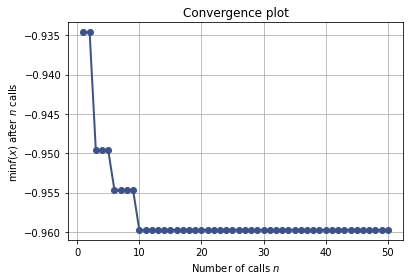

In [ ]:
plot_convergence(search)
plt.show()

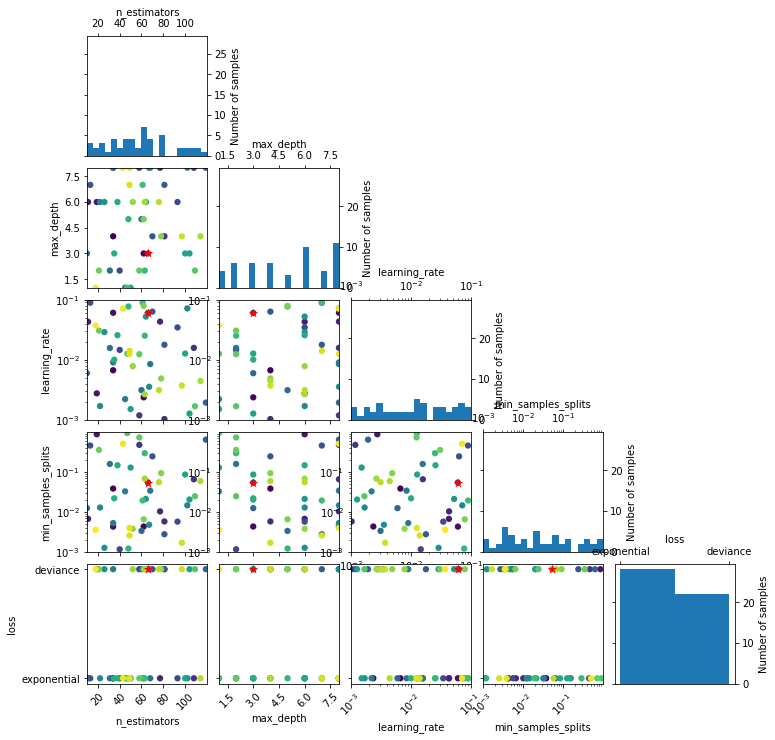

In [ ]:
plot_evaluations(search)
plt.show()

Generate the final model

In [ ]:
model = XGBClassifier(n_estimators = best_params['n_estimators'],
                      max_depth = best_params['max_depth'],
                      min_samples_split = best_params['min_samples_split'],
                      learning_rate = best_params['learning_rate'],
                      loss = best_params['loss'])

In [ ]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(learning_rate=0.06040764283363223, loss='deviance',
              min_samples_split=0.05375932755132062, n_estimators=66)>

In [ ]:
model.fit(X_train,y_train)

XGBClassifier(learning_rate=0.06040764283363223, loss='deviance',
              min_samples_split=0.05375932755132062, n_estimators=66)

Evaluate the final model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('train accuracy : ',accuracy_score(y_train,model.predict(X_train)))
print('test accuracy : ',accuracy_score(y_test,model.predict(X_test)))

train accuracy :  0.992462311557789
test accuracy :  0.9707602339181286
